In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "/Users/roshanmehta/Desktop/archive"

credits_df = pd.read_csv(path + "/tmdb_5000_credits.csv")
movies_df = pd.read_csv(path + "/tmdb_5000_movies.csv")

In [3]:
print(credits_df.shape)
credits_df.head(2)

(4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
print(movies_df.shape)
movies_df.head(2)

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
#credits_df.columns = ['id','title','cast','crew']

#movies_df = movies_df.merge(credits_df, on="id")
#movies_df = movies_df.drop(columns = "homepage")

movies_df = pd.merge(movies_df, credits_df, how = 'inner').drop(columns = 'movie_id')

In [8]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


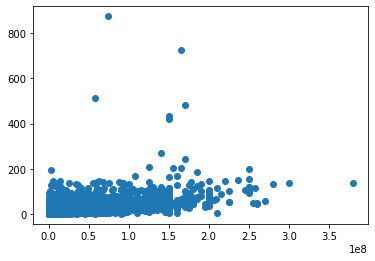

In [9]:
plt.scatter('budget', 'popularity', data=movies_df)

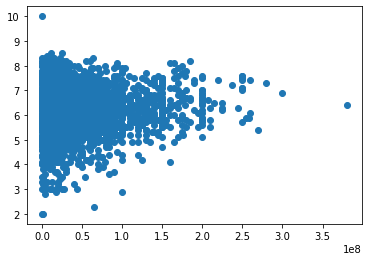

In [10]:
plt.scatter('budget', 'vote_average', data=movies_df[(movies_df.vote_average != 0) & (movies_df.budget != 0)])

In [11]:
from ast import literal_eval

features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

movies_df[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [12]:
#movies_df.loc[0, 'crew']

In [13]:
# extract the name of the director of the movie

def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [14]:
# returns the top 3 elements (or the entire list whichever is more)

def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

In [15]:
# applying both the functions

movies_df["director"] = movies_df["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [16]:
movies_df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [17]:
# cleaning data

def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

In [18]:
# creating a soup

def create_soup(features):
    return ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])


movies_df["soup"] = movies_df.apply(create_soup, axis=1)
print(movies_df["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count_vectorizer = CountVectorizer(stop_words="english")
count_matrix = count_vectorizer.fit_transform(movies_df["soup"])

print(count_matrix.shape)

cosine_sim2 = cosine_similarity(count_matrix, count_matrix) 
print(cosine_sim2.shape)

movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

(4809, 11520)
(4809, 4809)


In [20]:
# Creating a reverse mapping of movie titles to the indices
# Then we are able to find the title of the movie based on the index

indices = pd.Series(movies_df.index, index=movies_df["title"]).drop_duplicates()

print(indices.head())

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [59]:
# Get recommendations for the movies
# function that takes in a movie title and the cosine similarity score as input
# and outputs 10 movies similar to it.

def get_recommendations(title, cosine_sim=cosine_sim2):
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores= similarity_scores[1:11]
    # (a, b) where a is id of movie, b is similarity_scores

    movies_indices = [ind[0] for ind in similarity_scores]
    movies = movies_df["title"].iloc[movies_indices]
    #print(type(movies))
    return movies

In [61]:
print("Recommendations for Bee Movie")
print(get_recommendations("Bee Movie", cosine_sim2))
print()
print("Recommendations for Iron Man")
print(get_recommendations("Iron Man", cosine_sim2))

Recommendations for Bee Movie
2188                           Pooh's Heffalump Movie
1432                                          Valiant
358                         Atlantis: The Lost Empire
302     Legend of the Guardians: The Owls of Ga'Hoole
294                                              Epic
479                            Walking With Dinosaurs
1626                                  Winnie the Pooh
2125                                 The Tigger Movie
3134                                   Jungle Shuffle
3678                                  Running Forever
Name: title, dtype: object

Recommendations for Iron Man
79                      Iron Man 2
7          Avengers: Age of Ultron
16                    The Avengers
26      Captain America: Civil War
31                      Iron Man 3
39                    TRON: Legacy
4407           The Helix... Loaded
83                      The Lovers
193                    After Earth
4124            Six-String Samurai
Name: title, dtype: obj

In [62]:
get_recommendations('Skyfall')

2                                  Spectre
11                       Quantum of Solace
134     Mission: Impossible - Rogue Nation
245                    Tomorrow Never Dies
277                          Casino Royale
425                    Mission: Impossible
1285                     The Hunting Party
1346                 Never Say Never Again
3341                  Diamonds Are Forever
600                           Killer Elite
Name: title, dtype: object

In [63]:
get_recommendations('Toy Story')

42                                            Toy Story 3
343                                           Toy Story 2
40                                                 Cars 2
533                                         Monster House
1989                                     Meet the Deedles
3408    Alpha and Omega: The Legend of the Saw Tooth Cave
927                             Christmas with the Kranks
120                           Madagascar: Escape 2 Africa
725                                        The Shaggy Dog
1457                                                 Zoom
Name: title, dtype: object

In [83]:
def use():
    mov = 'test'
    while True:
        if mov == '':
            print('That was fun! Come back after you\'ve watched another movie!')
            break
        mov = input("\nEnter a movie you recently enjoyed: ")
        if mov == '':
            print('That was fun! Come back after you\'ve watched another movie!')
            break
            
        try:
            print('Because you enjoyed this movie, we recommend: \n', get_recommendations(mov))
            
        except KeyError:
            print('Movie not found, please check spelling and try again!')
            use()

In [84]:
use()


Enter a movie you recently enjoyed: Avatar
Because you enjoyed this movie, we recommend: 
 206                         Clash of the Titans
71        The Mummy: Tomb of the Dragon Emperor
786                           The Monkey King 2
103                   The Sorcerer's Apprentice
131                                     G-Force
215      Fantastic 4: Rise of the Silver Surfer
466                            The Time Machine
715                           The Scorpion King
1      Pirates of the Caribbean: At World's End
5                                  Spider-Man 3
Name: title, dtype: object

Enter a movie you recently enjoyed: Up
Because you enjoyed this movie, we recommend: 
 231                                        Monsters, Inc.
1989                                     Meet the Deedles
3408    Alpha and Omega: The Legend of the Saw Tooth Cave
3119                                          Elsa & Fred
1586                                          The Nut Job
3678                   